# 01_eda_overview.ipynb

Exploratory Data Analysis for `move_summary.csv` generated from Melee frame data.

## 📦 Setup & Imports

In [8]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

# Load the dataset
df = pd.read_csv('../data/move_summary.csv')
df.head()

,character,move_name,startup,active_windows,multi_hit,damage_max,iasa,total_frames
0,Bowser,jab1,7.0,"[(7, 9)]",False,5.0,21.0,24
1,Bowser,jab2,8.0,"[(8, 10)]",False,6.0,26.0,29
2,Bowser,dashattack,10.0,"[(10, 13), (14, 17)]",True,11.0,56.0,59
3,Bowser,ftilt_h,12.0,"[(12, 16)]",False,15.0,37.0,47
4,Bowser,ftilt_m,12.0,"[(12, 16)]",False,14.0,37.0,47


## 📊 Basic Summary Stats

In [27]:
# Number of moves by character
df['character'].value_counts()
# df.query('multi_hit == True')['character'].value_counts()
# df.query('character == Kirby')['character']
df[df['character']=="Kirby"]

,character,move_name,startup,active_windows,multi_hit,damage_max,iasa,total_frames
257,Kirby,jab1,3.0,"[(3, 4)]",False,3.0,16.0,17
258,Kirby,jab2,2.0,"[(2, 3)]",False,4.0,16.0,19
259,Kirby,rapidjabs_start,NaN,[],False,NaN,NaN,7
260,Kirby,rapidjabs_loop,2.0,"[(2, 3)]",False,1.0,NaN,19
261,Kirby,rapidjabs_end,NaN,[],False,NaN,NaN,9
262,Kirby,dashattack,9.0,"[(9, 15), (16, 43)]",True,8.0,60.0,63
263,Kirby,ftilt_h,5.0,"[(5, 8)]",False,11.0,28.0,32
264,Kirby,ftilt_m,5.0,"[(5, 8)]",False,11.0,28.0,32
265,Kirby,ftilt_l,5.0,"[(5, 8)]",False,11.0,28.0,32
266,Kirby,utilt,4.0,"[(4, 4), (5, 7)]",True,8.0,NaN,23


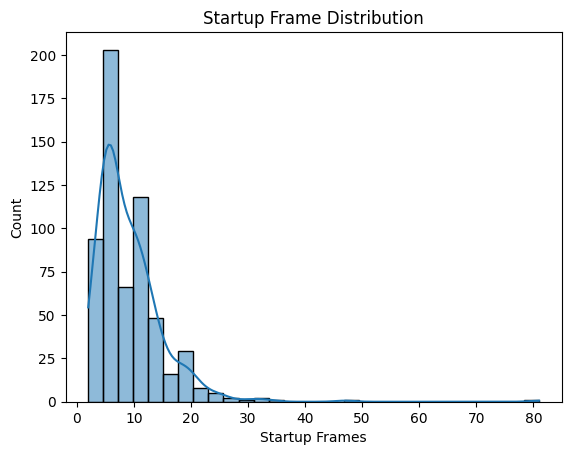

In [3]:
# Distribution of startup frames
sns.histplot(df['startup'].dropna(), bins=30, kde=True)
plt.title('Startup Frame Distribution')
plt.xlabel('Startup Frames')
plt.ylabel('Count')
plt.show()

## 📈 Damage vs Startup Scatter

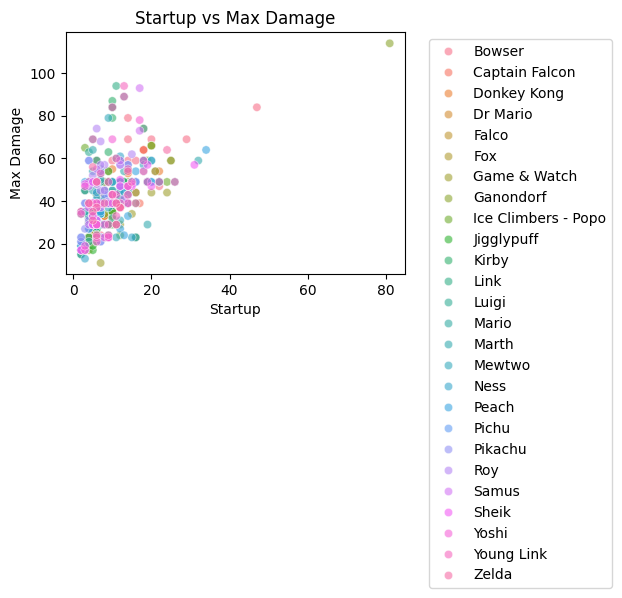

In [7]:
sns.scatterplot(data=df, x='startup', y='total_frames', hue='character', alpha=0.6)
plt.title('Startup vs Max Damage')
plt.xlabel('Startup')
plt.ylabel('Max Damage')
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()

## 🔍 Outlier Exploration

In [5]:
# Moves with unusually high damage
df[df['damage_max'] > 20].sort_values(by='damage_max', ascending=False)

,character,move_name,startup,active_windows,multi_hit,damage_max,iasa,total_frames
386,Marth,nspecial_end_full,5.0,"[(5, 10)]",False,28.0,NaN,33
390,Marth,nspecial_end_full_air,5.0,"[(5, 10), (30, 31)]",True,28.0,NaN,33
389,Marth,nspecial_end_air,5.0,"[(5, 10), (30, 31)]",True,28.0,NaN,33
190,Ganondorf,utilt,81.0,"[(81, 83)]",False,27.0,113.0,114
451,Ness,fsmash_m,16.0,"[(16, 17)]",False,24.0,NaN,49
8,Bowser,fsmash_m,29.0,"[(29, 33)]",False,24.0,66.0,69
192,Ganondorf,fsmash_h,20.0,"[(20, 24)]",False,24.0,60.0,66
193,Ganondorf,fsmash_m,20.0,"[(20, 24)]",False,22.0,60.0,66
201,Ganondorf,dair,16.0,"[(16, 20)]",False,22.0,38.0,44
302,Link,dair,13.0,"[(13, 15), (16, 64)]",True,22.0,80.0,89


In [6]:
# Moves with extremely fast startup (<= 2 frames)
df[df['startup'] <= 2].sort_values(by='startup')

,character,move_name,startup,active_windows,multi_hit,damage_max,iasa,total_frames
77,Dr Mario,jab1,2.0,"[(2, 3)]",False,4.0,NaN,15
78,Dr Mario,jab2,2.0,"[(2, 3)]",False,3.0,NaN,17
103,Falco,jab1,2.0,"[(2, 3)]",False,4.0,16.0,17
104,Falco,jab2,2.0,"[(2, 3)]",False,4.0,18.0,19
106,Falco,rapidjabs_loop,2.0,"[(2, 3)]",False,1.0,NaN,35
131,Fox,jab1,2.0,"[(2, 3)]",False,4.0,16.0,17
132,Fox,jab2,2.0,"[(2, 3)]",False,4.0,18.0,19
134,Fox,rapidjabs_loop,2.0,"[(2, 3)]",False,1.0,NaN,35
258,Kirby,jab2,2.0,"[(2, 3)]",False,4.0,16.0,19
260,Kirby,rapidjabs_loop,2.0,"[(2, 3)]",False,1.0,NaN,19


## 🧠 Next Steps
- Normalize features for clustering
- Investigate IASA vs total frame gaps
- Begin tagging moves by hypothesized function (poke, wall, etc)
- Cross-check with `theory_log.md` for feature mapping